# Name : Vignesh Nagarajan  (UID: 606185377)


In [ ]:
%cd '/content/drive/MyDrive/Twitter_project'

/content/drive/MyDrive/Twitter_project


In [1]:
import json
import numpy as np
import statsmodels.api as sm
from sklearn import metrics

def report_statistics(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()
        max_time = 0
        min_time = np.inf
        total_followers = 0
        total_retweets = 0
        total_tweets = len(lines)
        for line in lines:
            json_obj = json.loads(line)
            if json_obj['citation_date'] > max_time:
                max_time = json_obj['citation_date']
            if json_obj['citation_date'] < min_time:
                min_time = json_obj['citation_date']
            total_followers += json_obj['author']['followers']
            total_retweets += json_obj['metrics']['citations']['total']
        avg_tweets_per_h = total_tweets * 3600 / (max_time - min_time)
        avg_followers_per_tweet = total_followers / total_tweets
        avg_retweets_per_tweet = total_retweets / total_tweets
        print(filename)
        print('Average number of tweets per hour: ', avg_tweets_per_h)
        print('Average number of followers of users posting the tweets per tweet: ', avg_followers_per_tweet)
        print('Average number of retweets per tweet: ', avg_retweets_per_tweet)
        print('-' * 50)


In [4]:
files = ['/content/drive/MyDrive/Twitter_project/tweets/tweets_#gohawks.txt', '/content/drive/MyDrive/Twitter_project/tweets/tweets_#gopatriots.txt',
         '/content/drive/MyDrive/Twitter_project/tweets/tweets_#nfl.txt', '/content/drive/MyDrive/Twitter_project/tweets/tweets_#patriots.txt',
         '/content/drive/MyDrive/Twitter_project/tweets/tweets_#sb49.txt', '/content/drive/MyDrive/Twitter_project/tweets/tweets_#superbowl.txt']

for file in files:
    report_statistics(file)


/content/drive/MyDrive/Twitter_project/tweets/tweets_#gohawks.txt
Average number of tweets per hour:  292.48785062173687
Average number of followers of users posting the tweets per tweet:  2217.9237355281984
Average number of retweets per tweet:  2.0132093991319877
--------------------------------------------------
/content/drive/MyDrive/Twitter_project/tweets/tweets_#gopatriots.txt
Average number of tweets per hour:  40.954698006061946
Average number of followers of users posting the tweets per tweet:  1427.2526051635405
Average number of retweets per tweet:  1.4081919101697078
--------------------------------------------------
/content/drive/MyDrive/Twitter_project/tweets/tweets_#nfl.txt
Average number of tweets per hour:  397.0213901819841
Average number of followers of users posting the tweets per tweet:  4662.37544523693
Average number of retweets per tweet:  1.5344602655543254
--------------------------------------------------
/content/drive/MyDrive/Twitter_project/tweets/tweets_

# Answer 9.1

| Hashtag       | Tweets per Hour | Followers per Tweet | Retweets per Tweet |
|---------------|-----------------|---------------------|--------------------|
| #gohawks      | 292.49          | 2217.92             | 2.01               |
| #gopatriots   | 40.95           | 1427.25             | 1.41               |
| #nfl          | 397.02          | 4662.38             | 1.53               |
| #patriots     | 750.89          | 3280.46             | 1.79               |
| #sb49         | 1276.86         | 10374.16            | 2.53               |
| #superbowl    | 2072.12         | 8814.97             | 2.39               |


The data indicates that #sb49 and #superbowl consistently exhibit higher values across all three metrics compared to the other hashtags. This could be attributed to their broader appeal, as they are associated with the overall event rather than specific teams. Conversely, hashtags like #gohawks, #gopatriots, and #patriots may attract a smaller audience consisting mainly of supporters of those particular teams.

Furthermore, the popularity of #gohawks likely exceeded that of #gopatriots due to the Seattle Seahawks' status as the defending champions. However, the eventual victory of the New England Patriots may have caused a surge in the usage of the #patriots hashtag while diminishing the popularity of #gohawks.

In [8]:
import math
import matplotlib.pyplot as plt
import datetime
import pytz

pst_tz = pytz.timezone('America/Los_Angeles')

def report_tweets(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()
        max_time = 0
        min_time = np.inf
        total_tweets = len(lines)
        for line in lines:
            json_obj = json.loads(line)
            if json_obj['citation_date'] > max_time:
                max_time = json_obj['citation_date']
            if json_obj['citation_date'] < min_time:
                min_time = json_obj['citation_date']

        total_hours = math.ceil((max_time - min_time) / 3600)
        n_tweets = [0] * total_hours
        for line in lines:
            json_obj = json.loads(line)
            index = math.floor((json_obj['citation_date'] - min_time) / 3600)
            n_tweets[index] += 1
        return n_tweets


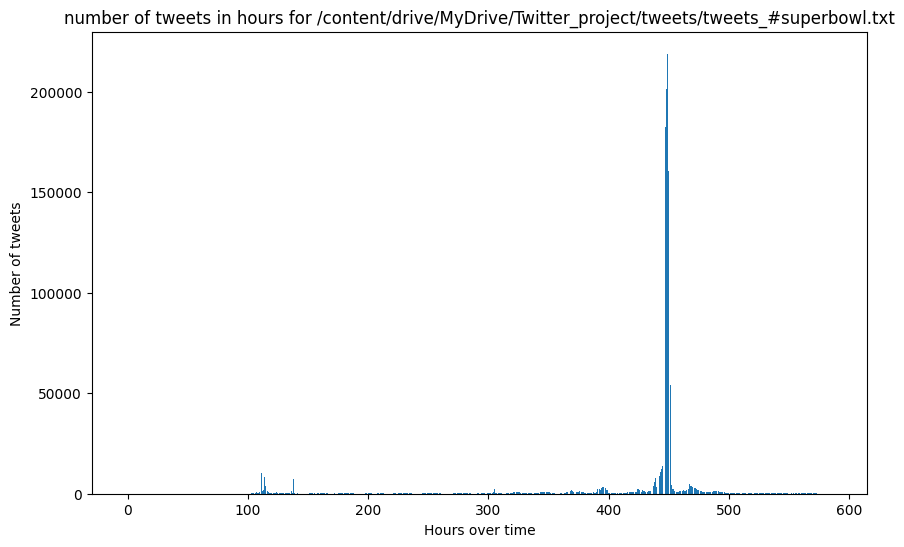

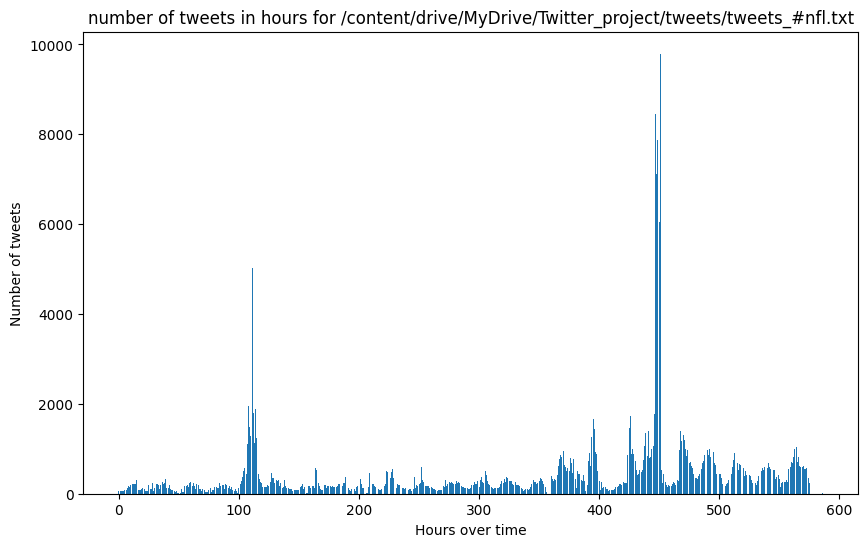

In [ ]:
from matplotlib import pyplot as plt
plotdata = ['/content/drive/MyDrive/Twitter_project/tweets/tweets_#superbowl.txt','/content/drive/MyDrive/Twitter_project/tweets/tweets_#nfl.txt']

for file in plotdata:
    n_tweets = report_tweets(file)
    plt.figure(figsize=(10,6))
    plt.bar(range(len(n_tweets)),n_tweets)
    plt.xlabel('Hours over time')
    plt.ylabel('Number of tweets')
    plt.title('number of tweets in hours for '+file)


# Answer 9.2

Plots are as shown above

# Answer 10

- Data preprocessing steps were conducted prior to feature selection and prediction tasks:
  - Tweets were extracted from the dataset using the JSON object reference json_obj['tweet']['text'].
  - Labels for each tweet were created as they were not originally present in the dataset. These labels indicate which team's fan the tweet is associated with.
  - Regular expressions were utilized to find all hashtags in the tweet, which were then scanned to determine if they matched the patterns for "hawks" or "patriots."
  - One-hot label encoding was applied, where [0,1] indicated a tweet from a Patriots fan and [1,0] indicated a tweet from a Hawks fan.
  - The "#" symbol was removed from the tweet text before feature selection to ensure that words associated with hashtags were considered by the feature selection models.
  - Tweets with labels belonging to both Patriots and Hawks, or neither, were removed from the dataset, resulting in a dataset size of 158153 tweets.
  - The dataset was split into training and testing sets using a test size of 0.2.

- Feature selection was performed using methods learned in previous projects:
  - Each tweet in the dataset was cleaned by removing HTML artifacts and then passed through a lemmatization function utilizing POS tagging.
  - A TfidfVectorizer(stop words='english', min_df=3) was fitted to the lemmatized data features, assigning weights to each word in the dataset and building a model.
  - To reduce the number of features, the top 50 features were selected using SVD decomposition with the TruncatedSVD() function.
  - The selected features were projected onto both the training and testing sets, resulting in final shapes of (126522, 50) for x train and (31631, 50) for x test.

- Team classification was performed using two models:
  - The first model utilized LogisticRegression() with parameter grid search conducted using GridSearchCV() for a 4-fold cross-validation. Parameters included 'L2' penalty and no penalty, with C values ranging from 0.01 to 100. The best model found had parameters C=0.01 and penalty='none'.
  - The second model used RandomForestClassifier() with a parameter grid search performed, varying max depth from 10 to 200. The best model from the grid search had a max depth of 50.





In [9]:
import math, datetime
def report_features(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()
        max_time = 0
        min_time = np.inf
        total_tweets = len(lines)
        total_followers = 0
        total_retweets = 0
        for line in lines:
            json_obj = json.loads(line)
            if json_obj['citation_date'] > max_time:
                max_time = json_obj['citation_date']
            if json_obj['citation_date'] < min_time:
                min_time = json_obj['citation_date']
            total_followers += json_obj['author']['followers']
            total_retweets += json_obj['metrics']['citations']['total']

        total_hours = math.ceil((max_time - min_time) / 3600)
        #initialize features
        features = np.zeros((total_hours,5))
        for hour in range(total_hours):
            features[hour][4] = datetime.datetime.fromtimestamp((min_time + hour * 3600), pst_tz).hour
        for line in lines:
            json_obj = json.loads(line)
            index = math.floor((json_obj['citation_date'] - min_time) / 3600)
            features[index][0] += 1
            features[index][1] += json_obj['metrics']['citations']['total']
            features[index][2] += json_obj['author']['followers']
            features[index][3] = max(features[index][3], json_obj['author']['followers'])

    return features




for file in files:
    features = report_features(file)
    x = features[:-1,:]
    y_true = features[1:,0]

    lr_fit = sm.OLS(y_true,x).fit()
    y_pred = lr_fit.predict()
    print('Hashtag: ' + file)
    print('MSE: ', metrics.mean_squared_error(y_true, y_pred))
    print(lr_fit.summary())
    print('\n')


Hashtag: /content/drive/MyDrive/Twitter_project/tweets/tweets_#gohawks.txt
MSE:  717636.4421300612
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.528
Model:                            OLS   Adj. R-squared (uncentered):              0.524
Method:                 Least Squares   F-statistic:                              128.2
Date:                Mon, 18 Mar 2024   Prob (F-statistic):                    5.72e-91
Time:                        03:28:31   Log-Likelihood:                         -4716.9
No. Observations:                 578   AIC:                                      9444.
Df Residuals:                     573   BIC:                                      9466.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef

In [10]:
def get_time_interval(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()
        max_time = 0
        min_time = np.inf
        for line in lines:
            json_obj = json.loads(line)
            if json_obj['citation_date'] > max_time:
                max_time = json_obj['citation_date']
            if json_obj['citation_date'] < min_time:
                min_time = json_obj['citation_date']
        return max_time, min_time

max_t = []
min_t = []
for file in files:
    max_time, min_time = get_time_interval(file)
    max_t.append(max_time)
    min_t.append(min_time)

max_time_agg = min(max_t)
min_time_agg = max(min_t)


In [11]:
feature_names = ['Number of tweets', 'Total number of retweets', 'Sum of the number of followers',
                'Maximum number of followers', 'Time of the day', 'Sum of ranking score',
                'Sum of passivity', 'Total number of unique users','Total number of unique authors',
                'Total number of user mentions']

mnth_to_int = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
              'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}

def get_days(user_create_time, tweet_create_time):
    user_create_date = user_create_time.split(' ')
    tweet_create_date = tweet_create_time.split(' ')
    user_create_date = datetime.datetime(int(user_create_date[-1]), mnth_to_int[user_create_date[1]], int(user_create_date[2]))
    tweet_create_date = datetime.datetime(int(tweet_create_date[-1]), mnth_to_int[tweet_create_date[1]], int(tweet_create_date[2]))
    created_days = tweet_create_date - user_create_date
    created_days = created_days.days
    return created_days

def report_features2(filename, min_time, max_time):
    with open(filename, 'r') as file:
        lines = file.readlines()

        total_hours = math.ceil((max_time - min_time) / 3600)
        user_ids = {hour:set() for hour in range(total_hours)}
        author_nicks = {hour:set() for hour in range(total_hours)}

        features = np.zeros((total_hours,len(feature_names)))

        for hour in range(total_hours):
            features[hour][4] = datetime.datetime.fromtimestamp((min_time + hour * 3600), pst_tz).hour

        for line in lines:
            json_obj = json.loads(line)

            if json_obj['citation_date'] >= min_time and json_obj['citation_date'] <= max_time:
                index = math.floor((json_obj['citation_date'] - min_time) / 3600)
                features[index][0] += 1 #number of tweets
                features[index][1] += json_obj['metrics']['citations']['total']
                features[index][2] += json_obj['author']['followers']
                features[index][3] = max(features[index][3], json_obj['author']['followers'])

                features[index][5] += json_obj['metrics']['ranking_score']
                n_days = get_days(json_obj['tweet']['user']['created_at'], json_obj['tweet']['created_at'])
                features[index][6] += n_days/(1.0 + json_obj['tweet']['user']['statuses_count'])
                if json_obj['tweet']['user']['id'] not in user_ids[index]:
                    user_ids[index].add(json_obj['tweet']['user']['id'])
                features[index][7] = len(user_ids[index])
                if json_obj['author']['nick'] not in author_nicks[index]:
                    author_nicks[index].add(json_obj['author']['nick'])
                features[index][8] = len(author_nicks[index])
                features[index][9] += len(json_obj['tweet']['entities']['user_mentions'])

        return features
def scatter_plot(features, hashtag, y_pred, pvalues, feature_names):
    ranked_index = np.argsort(pvalues)
    print('Hashtag: ' + hashtag)
    for i in range(3):
        plt.figure(figsize = (8,5))
        plt.scatter(features[:,ranked_index[i]], y_pred, alpha=0.5)
        plt.xlabel(feature_names[ranked_index[i]])
        plt.ylabel("Number of tweets next hour")
        plt.grid(True)
        plt.show()
    print('-' * 80)


Hashtag: /content/drive/MyDrive/Twitter_project/tweets/tweets_#gohawks.txt
MSE:  296042.31731156004
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.783
Model:                            OLS   Adj. R-squared (uncentered):              0.779
Method:                 Least Squares   F-statistic:                              201.8
Date:                Mon, 18 Mar 2024   Prob (F-statistic):                   1.43e-178
Time:                        03:38:11   Log-Likelihood:                         -4407.0
No. Observations:                 571   AIC:                                      8834.
Df Residuals:                     561   BIC:                                      8878.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coe

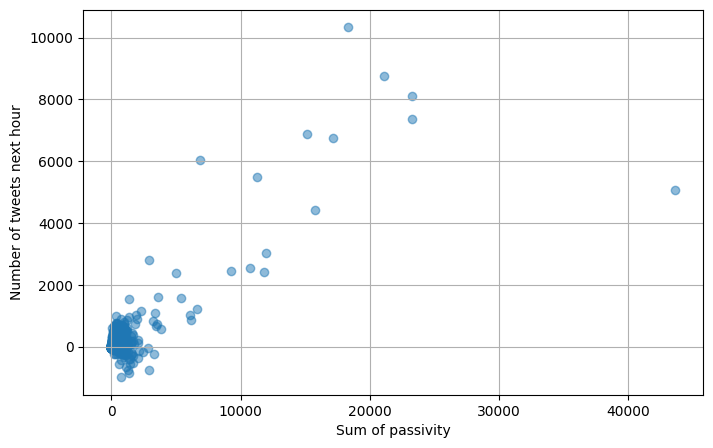

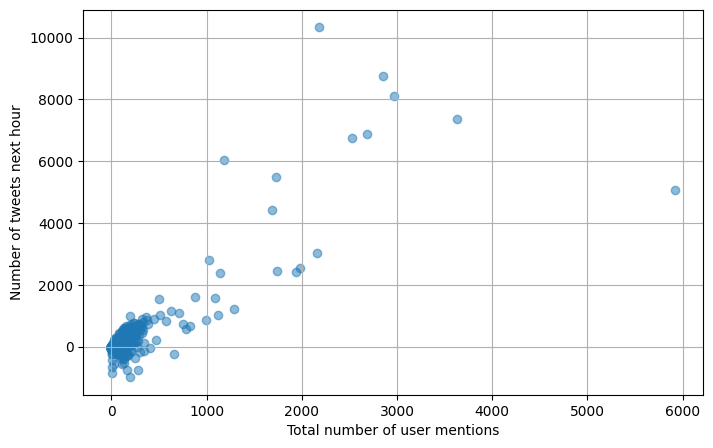

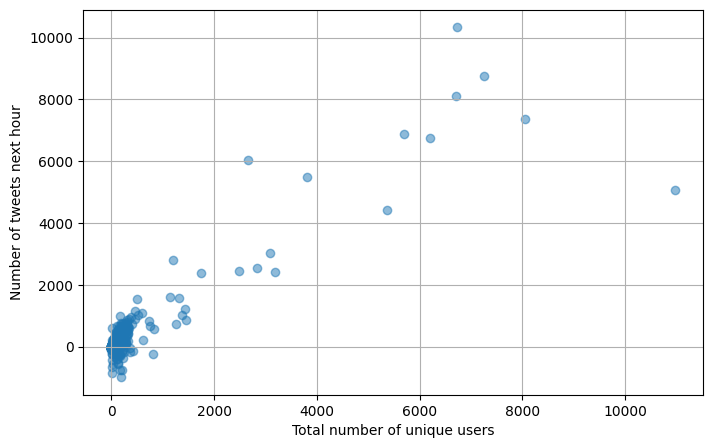

--------------------------------------------------------------------------------


Hashtag: /content/drive/MyDrive/Twitter_project/tweets/tweets_#gopatriots.txt
MSE:  21727.945699825843
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.742
Model:                            OLS   Adj. R-squared (uncentered):              0.738
Method:                 Least Squares   F-statistic:                              161.6
Date:                Mon, 18 Mar 2024   Prob (F-statistic):                   5.56e-158
Time:                        03:38:15   Log-Likelihood:                         -3661.3
No. Observations:                 571   AIC:                                      7343.
Df Residuals:                     561   BIC:                                      7386.
Df Model:                          10                                                  
Covariance Type:      

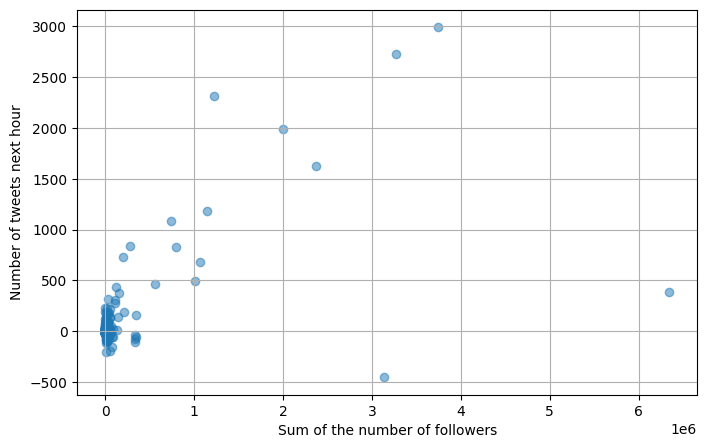

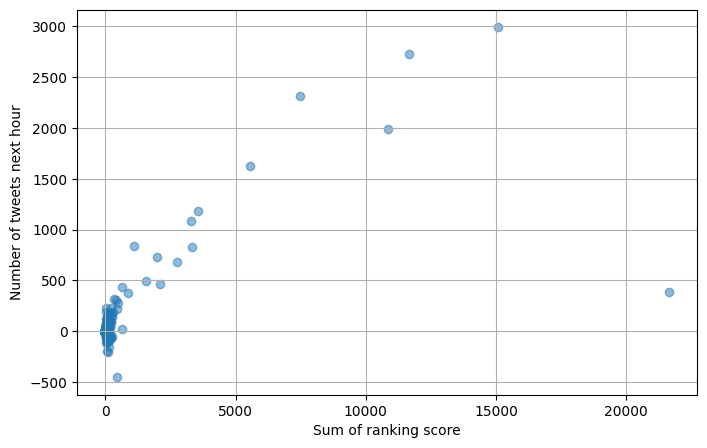

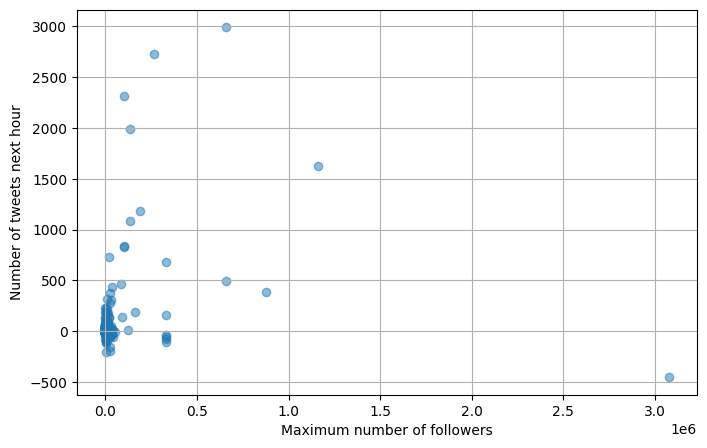

--------------------------------------------------------------------------------


Hashtag: /content/drive/MyDrive/Twitter_project/tweets/tweets_#nfl.txt
MSE:  184288.3990593135
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.768
Model:                            OLS   Adj. R-squared (uncentered):              0.764
Method:                 Least Squares   F-statistic:                              186.0
Date:                Mon, 18 Mar 2024   Prob (F-statistic):                   7.02e-171
Time:                        03:38:36   Log-Likelihood:                         -4271.7
No. Observations:                 571   AIC:                                      8563.
Df Residuals:                     561   BIC:                                      8607.
Df Model:                          10                                                  
Covariance Type:            no

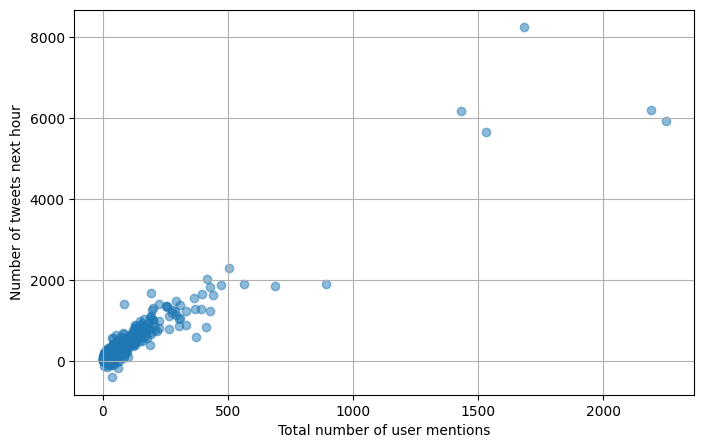

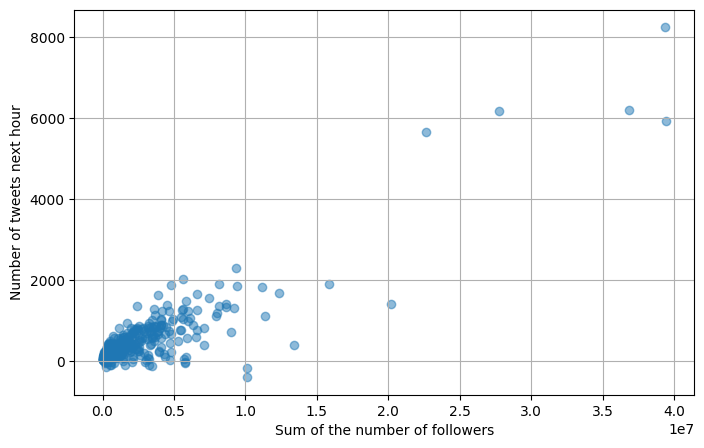

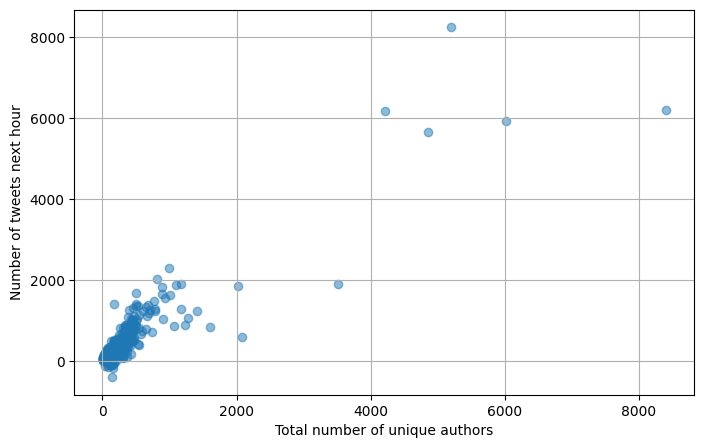

--------------------------------------------------------------------------------


Hashtag: /content/drive/MyDrive/Twitter_project/tweets/tweets_#patriots.txt
MSE:  3619767.990944837
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.783
Model:                            OLS   Adj. R-squared (uncentered):              0.779
Method:                 Least Squares   F-statistic:                              202.0
Date:                Mon, 18 Mar 2024   Prob (F-statistic):                   1.18e-178
Time:                        03:39:13   Log-Likelihood:                         -5121.8
No. Observations:                 571   AIC:                                  1.026e+04
Df Residuals:                     561   BIC:                                  1.031e+04
Df Model:                          10                                                  
Covariance Type:         

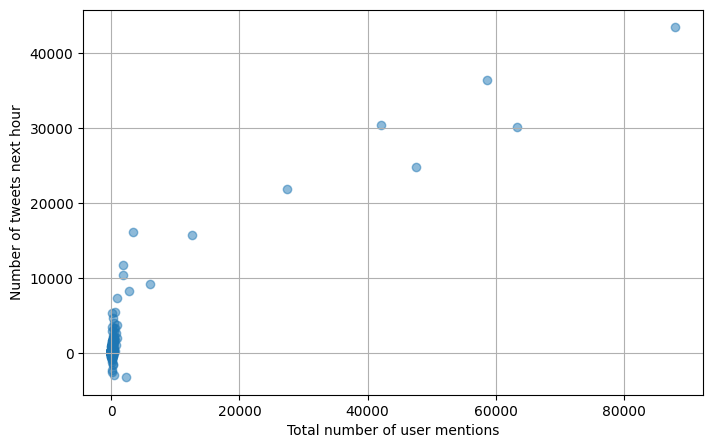

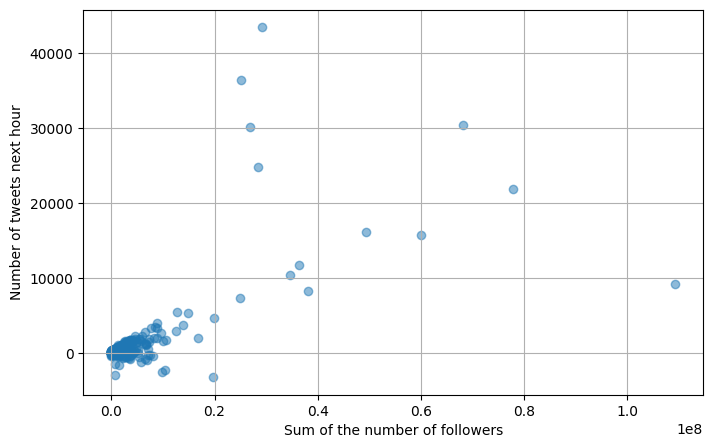

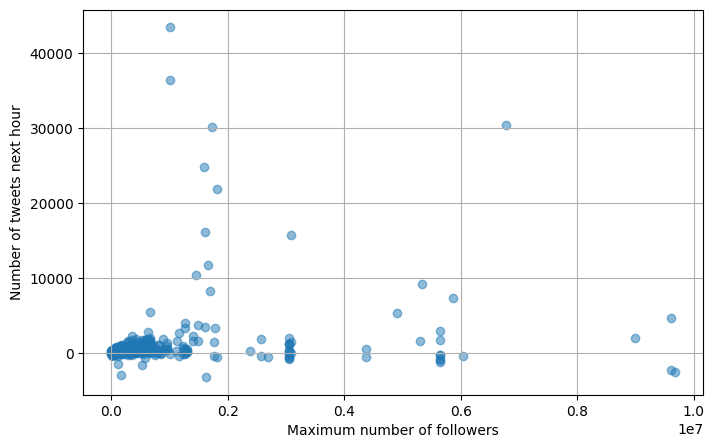

--------------------------------------------------------------------------------


Hashtag: /content/drive/MyDrive/Twitter_project/tweets/tweets_#sb49.txt
MSE:  8860126.964503309
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.895
Model:                            OLS   Adj. R-squared (uncentered):              0.894
Method:                 Least Squares   F-statistic:                              480.7
Date:                Mon, 18 Mar 2024   Prob (F-statistic):                   1.30e-267
Time:                        03:40:15   Log-Likelihood:                         -5377.4
No. Observations:                 571   AIC:                                  1.077e+04
Df Residuals:                     561   BIC:                                  1.082e+04
Df Model:                          10                                                  
Covariance Type:            n

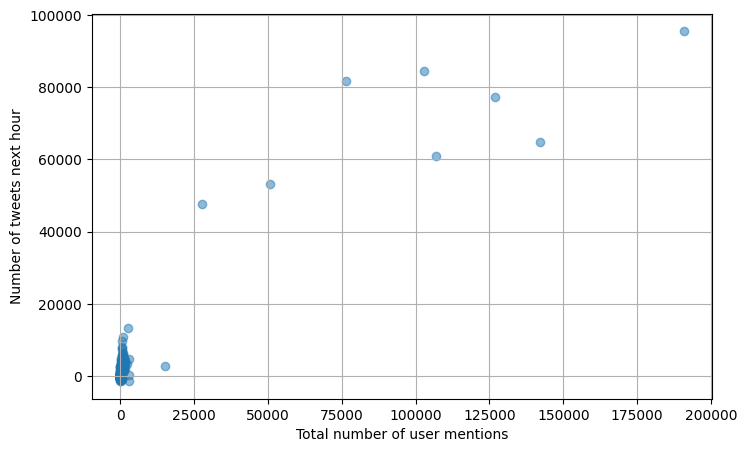

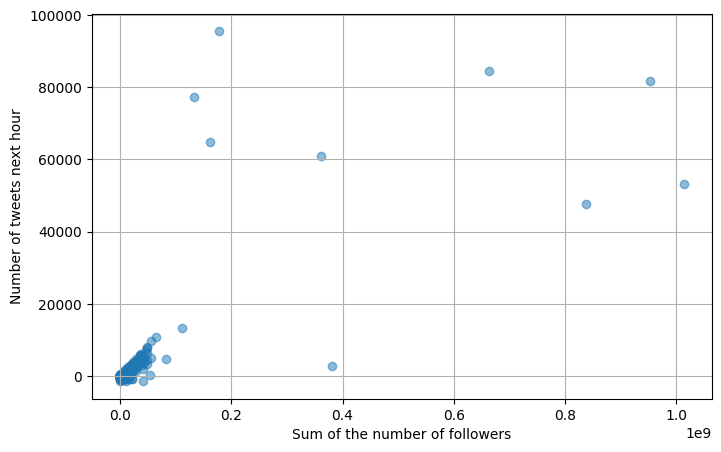

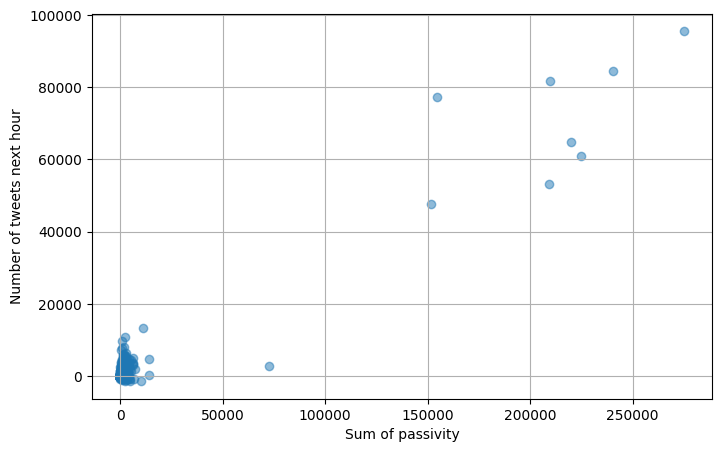

--------------------------------------------------------------------------------


Hashtag: /content/drive/MyDrive/Twitter_project/tweets/tweets_#superbowl.txt
MSE:  15458967.54483511
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.943
Model:                            OLS   Adj. R-squared (uncentered):              0.942
Method:                 Least Squares   F-statistic:                              932.3
Date:                Mon, 18 Mar 2024   Prob (F-statistic):                        0.00
Time:                        03:41:59   Log-Likelihood:                         -5536.3
No. Observations:                 571   AIC:                                  1.109e+04
Df Residuals:                     561   BIC:                                  1.114e+04
Df Model:                          10                                                  
Covariance Type:        

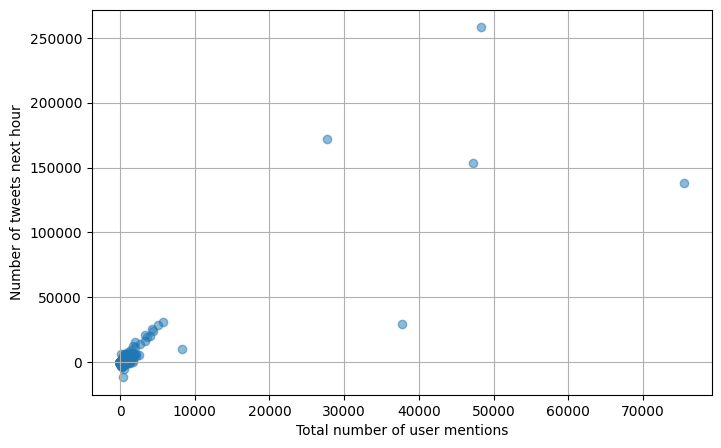

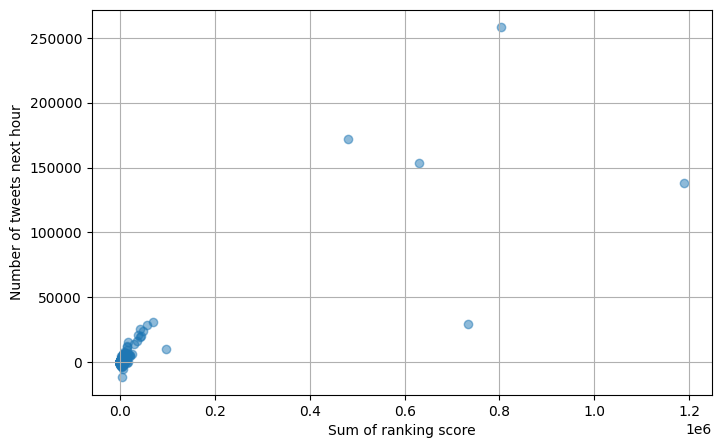

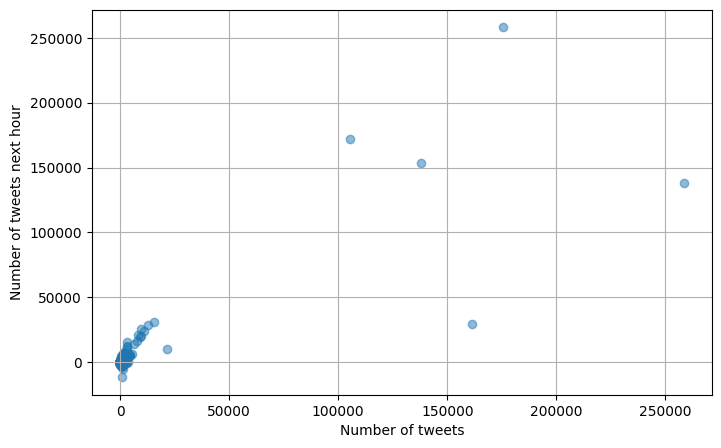

--------------------------------------------------------------------------------




In [12]:
import statsmodels.api as sm
from sklearn import metrics


for file in files:
    features = report_features2(file, min_time_agg, max_time_agg)
    x = features[:-1,:] #training features
    y_true = features[1:,0] #true labels

    lr_fit = sm.OLS(y_true,x).fit()
    y_pred = lr_fit.predict()
    pvalues = lr_fit.pvalues
    print('Hashtag: ' + file)
    print('MSE: ', metrics.mean_squared_error(y_true, y_pred))
    print(lr_fit.summary())
    scatter_plot(x, file, y_pred, pvalues, feature_names)
    print('\n')


In [13]:
# find the intersected time intervals for all twitter data
def get_time_interval(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()
        max_time = 0
        min_time = np.inf
        for line in lines:
            json_obj = json.loads(line)
            if json_obj['citation_date'] > max_time:
                max_time = json_obj['citation_date']
            if json_obj['citation_date'] < min_time:
                min_time = json_obj['citation_date']
        return max_time, min_time

max_t = []
min_t = []
for file in files:
    max_time, min_time = get_time_interval(file)
    max_t.append(max_time)
    min_t.append(min_time)

max_time_agg = min(max_t)
min_time_agg = max(min_t)


In [15]:
print(max_time_agg)
print(min_time_agg)

1423295675
1421238675


# Fanbase prediction

In [3]:
import json
# exclude any tweets whose author is not from Washington or Massachusetts
WA_substrings = ['Washington', 'Seattle', 'WA']
MA_substrings = ['Massachusetts', 'Boston', 'MA']

superbowl_dataset_trimmed = []

with open('/content/drive/MyDrive/Twitter_project/tweets/tweets_#superbowl.txt', 'r') as file:
    lines = file.readlines()

    for line in lines:
        json_obj = json.loads(line)
        location = json_obj['tweet']['user']['location']

        for w in WA_substrings:
            if w in location:
                superbowl_dataset_trimmed.append((json_obj['tweet']['text'], 'Washington'))
                break

        for m in MA_substrings:
            if m in location:
                superbowl_dataset_trimmed.append((json_obj['tweet']['text'], 'Massachusetts'))
                break


## Training a binary classifier (Logistic regression)

In [4]:
import numpy as np
from sklearn.model_selection import train_test_split

x_superbowl = np.array(superbowl_dataset_trimmed)[:, 0]
y_superbowl = np.array(superbowl_dataset_trimmed)[:, 1]

y_superbowl_binary = np.zeros(y_superbowl.shape)
y_superbowl_binary[y_superbowl == 'Washington'] = 1

x_train, x_test, y_train, y_test = train_test_split(x_superbowl, y_superbowl_binary, test_size=0.1, random_state=42)


In [5]:
import nltk
# nltk.download('wordnet')
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')

from nltk import pos_tag
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet as wn
from collections import defaultdict

# pos_tags: treebank to wordnet
tag_map = defaultdict(lambda: wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

wnl = WordNetLemmatizer()

def lemmatize(data):
    lemmatized = []
    for doc in data:
        tokens = word_tokenize(doc)
        words = [wnl.lemmatize(word, tag_map[tag[0]]) for word,tag in pos_tag(tokens)
                 if wnl.lemmatize(word, tag_map[tag[0]]).isalpha()]
        sentence = ' '.join(words)
        lemmatized.append(sentence)
    return lemmatized


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

x_train_lemmatized = lemmatize(x_train)
x_test_lemmatized = lemmatize(x_test)

tfidf_vectorizer = TfidfVectorizer(stop_words='english', min_df=3)
x_train_tfidf = tfidf_vectorizer.fit_transform(x_train_lemmatized)
x_test_tfidf = tfidf_vectorizer.transform(x_test_lemmatized)

svd = TruncatedSVD(n_components=50, random_state=42)
x_train_svd = svd.fit_transform(x_train_tfidf)
x_test_svd = svd.transform(x_test_tfidf)


In [25]:
# Logistic Regression: GridSearch
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import pandas as pd


grid_logistic = GridSearchCV(estimator=LogisticRegression(random_state=42),
                        param_grid={'C':[10**-3,10**-2,10**-1,10**0,10**1,10**2,10**3],
                                   'penalty': ['l1', 'l2', 'elasticnet']},
                        cv=5, n_jobs=-1, verbose=1).fit(x_train_svd, y_train)

result_logistic = pd.DataFrame(grid_logistic.cv_results_)[['mean_test_score', 'param_C', 'param_penalty']]
result_logistic = result_logistic.sort_values(by=['mean_test_score'], ascending=False).reset_index(drop=True)
result_logistic.head()


Fitting 5 folds for each of 21 candidates, totalling 105 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
70 fits failed out of a total of 105.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solv

,mean_test_score,param_C,param_penalty
0,0.724328,100,l2
1,0.724305,1000,l2
2,0.724236,10,l2
3,0.723568,1,l2
4,0.718775,0.1,l2


In [26]:
logistic_optim = LogisticRegression(penalty=grid_logistic.best_params_['penalty'],
                                    C=grid_logistic.best_params_['C'], random_state=42)

logistic_optim.fit(x_train_svd, y_train)


LogisticRegression(C=100, random_state=42)

In [27]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

y_pred_logistic = logistic_optim.predict(x_test_svd)
y_pred_prob_logistic = logistic_optim.predict_proba(x_test_svd)[:,1]

print('Logistic Regression:')
print('confusion_matrix:\n', confusion_matrix(y_test, y_pred_logistic))
print('accuracy:', accuracy_score(y_test, y_pred_logistic))
print('recall:', recall_score(y_test, y_pred_logistic))
print('precision:', precision_score(y_test, y_pred_logistic))
print('f1_score:', f1_score(y_test, y_pred_logistic))


Logistic Regression:
confusion_matrix:
 [[1020 1139]
 [ 184 2480]]
accuracy: 0.7256894049346879
recall: 0.9309309309309309
precision: 0.6852721746338768
f1_score: 0.7894318000954959


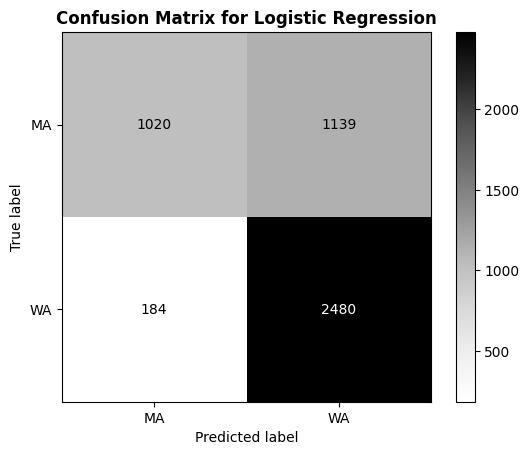

<Figure size 640x480 with 0 Axes>

In [31]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

class_names = ['MA', 'WA']

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_logistic), display_labels=class_names)
disp.plot(values_format='d', cmap=plt.cm.Greys)
plt.title('Confusion Matrix for Logistic Regression', fontweight='bold')
plt.show()
plt.tight_layout()


## Random Forest

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

pipe_rfc = Pipeline([
    ('standardize', StandardScaler()),
    ('model', RandomForestClassifier(random_state=42))
])

param_grid = {
    'model__max_depth': [10, 30, 50, 70, 100, 200, None]
}


grid_rfc = GridSearchCV(pipe_rfc, param_grid=param_grid, cv=KFold(5, shuffle=True, random_state=42), n_jobs=-1, verbose=1)
grid_rfc.fit(x_train_svd, y_train)

result_rfc = pd.DataFrame(grid_rfc.cv_results_)[['mean_test_score', 'param_model__max_depth']]
result_rfc = result_rfc.sort_values(by=['mean_test_score'], ascending=False).reset_index(drop=True)
result_rfc.head()


Fitting 5 folds for each of 7 candidates, totalling 35 fits


,mean_test_score,param_model__max_depth
0,0.723729,30
1,0.720595,70
2,0.720595,100
3,0.720595,200
4,0.720595,None


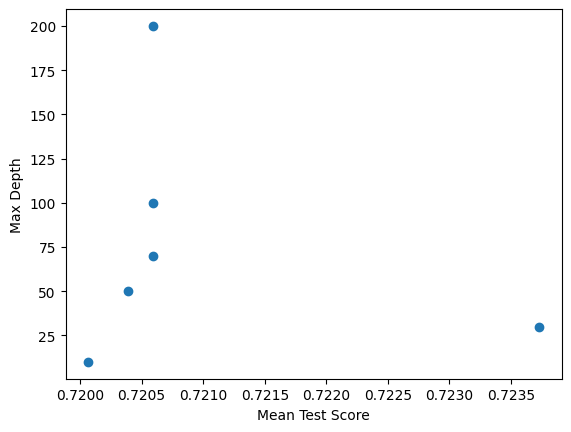

In [37]:
# @title Mean Test Score vs Max Depth

import matplotlib.pyplot as plt
plt.scatter(result_rfc['mean_test_score'], result_rfc['param_model__max_depth'])
plt.xlabel('Mean Test Score')
_ = plt.ylabel('Max Depth')

In [28]:
pipe_rfc_optim = Pipeline([
        ('standardize', StandardScaler()),
        ('model', RandomForestClassifier(max_depth=30, random_state=42))
])

pipe_rfc_optim.fit(x_train_svd, y_train)


Pipeline(steps=[('standardize', StandardScaler()),
                ('model',
                 RandomForestClassifier(max_depth=30, random_state=42))])

In [29]:
y_pred_rfc = pipe_rfc_optim.predict(x_test_svd)
y_pred_prob_rfc = pipe_rfc_optim.predict_proba(x_test_svd)[:,1]

print('Random Forest Classifer:')
print('confusion_matrix:\n', confusion_matrix(y_test, y_pred_rfc))
print('accuracy:', accuracy_score(y_test, y_pred_rfc))
print('recall:', recall_score(y_test, y_pred_rfc))
print('precision:', precision_score(y_test, y_pred_rfc))
print('f1_score:', f1_score(y_test, y_pred_rfc))


Random Forest Classifer:
confusion_matrix:
 [[1336  823]
 [ 484 2180]]
accuracy: 0.7290068422143894
recall: 0.8183183183183184
precision: 0.7259407259407259
f1_score: 0.7693665078524792


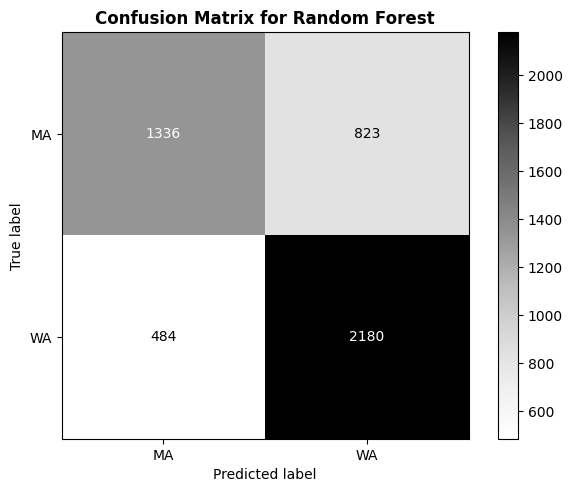

In [30]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_rfc), display_labels=class_names)
disp.plot(values_format='d', cmap=plt.cm.Greys)
plt.tight_layout()
plt.title('Confusion Matrix for Random Forest', fontweight='bold')
plt.show()


## SVC



In [23]:
from sklearn.svm import SVC

pipe_svc_optim = Pipeline([
        ('standardize', StandardScaler()),
        ('model', SVC(random_state=42, C = 1, kernel = 'linear' , gamma = 'auto'))
])

pipe_svc_optim.fit(x_train_svd, y_train)

y_pred_svc = pipe_svc_optim.predict(x_test_svd)
y_pred_prob_svc = pipe_svc_optim.predict(x_test_svd)

print('SVC:')
print('confusion_matrix:\n', confusion_matrix(y_test, y_pred_svc))
print('accuracy:', accuracy_score(y_test, y_pred_svc))
print('recall:', recall_score(y_test, y_pred_svc))
print('precision:', precision_score(y_test, y_pred_svc))
print('f1_score:', f1_score(y_test, y_pred_svc))


SVC:
confusion_matrix:
 [[ 950 1209]
 [ 172 2492]]
accuracy: 0.7136636947957703
recall: 0.9354354354354354
precision: 0.6733315320183734
f1_score: 0.7830322073841319


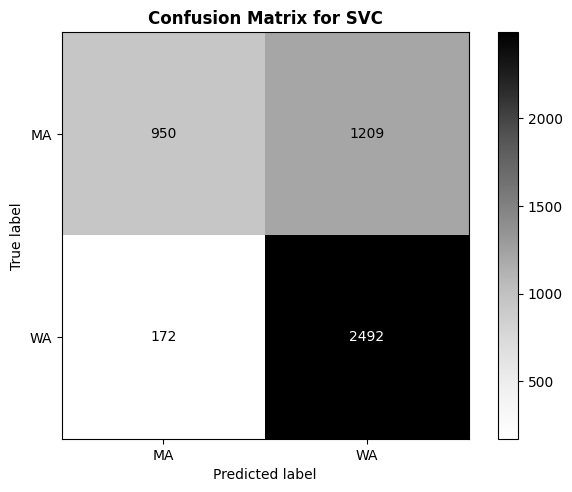

In [24]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_svc), display_labels=class_names)
disp.plot(values_format='d', cmap=plt.cm.Greys)
plt.tight_layout()
plt.title('Confusion Matrix for SVC', fontweight='bold')
plt.show()


# XGBoost

In [8]:
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler


# Create a pipeline for XGBoost Classifier
pipe_xgb = Pipeline([
    ('standardize', StandardScaler()),
    ('model', XGBClassifier(random_state=42))  # Adjust parameters as needed
])

# Fit the pipeline on the training data
pipe_xgb.fit(x_train_svd, y_train)


Pipeline(steps=[('standardize', StandardScaler()),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

In [10]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import ConfusionMatrixDisplay

y_pred_xgb = pipe_xgb.predict(x_test_svd)
y_pred_prob_xgb = pipe_xgb.predict_proba(x_test_svd)[:,1]

print('XGBoost:')
print('confusion_matrix:\n', confusion_matrix(y_test, y_pred_xgb))
print('accuracy:', accuracy_score(y_test, y_pred_xgb))
print('recall:', recall_score(y_test, y_pred_xgb))
print('precision:', precision_score(y_test, y_pred_xgb))
print('f1_score:', f1_score(y_test, y_pred_xgb))


XGBoost:
confusion_matrix:
 [[1355  804]
 [ 533 2131]]
accuracy: 0.7227866473149492
recall: 0.799924924924925
precision: 0.7260647359454855
f1_score: 0.7612073584568673


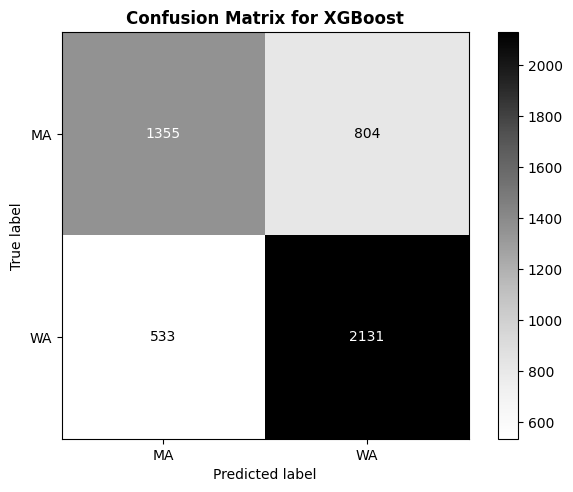

In [13]:
class_names = ['MA', 'WA']
from matplotlib import pyplot as plt
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_xgb), display_labels=class_names)
disp.plot(values_format='d', cmap=plt.cm.Greys)
plt.tight_layout()
plt.title('Confusion Matrix for XGBoost', fontweight='bold')
plt.show()


# AdaBoost

In [14]:
from sklearn.ensemble import AdaBoostClassifier

# Define the pipeline with feature scaling and AdaBoostClassifier
pipe_adaboost_optim = Pipeline([
    ('standardize', StandardScaler()),
    ('model', AdaBoostClassifier(random_state=42))
])

# Fit the pipeline on the training data
pipe_adaboost_optim.fit(x_train_svd, y_train)


Pipeline(steps=[('standardize', StandardScaler()),
                ('model', AdaBoostClassifier(random_state=42))])

In [15]:
y_pred_adaboost = pipe_adaboost_optim.predict(x_test_svd)
y_pred_prob_adaboost = pipe_adaboost_optim.predict_proba(x_test_svd)[:, 1]

print('AdaBoost:')
print('confusion_matrix:\n', confusion_matrix(y_test, y_pred_adaboost))
print('accuracy:', accuracy_score(y_test, y_pred_adaboost))
print('recall:', recall_score(y_test, y_pred_adaboost))
print('precision:', precision_score(y_test, y_pred_adaboost))
print('f1_score:', f1_score(y_test, y_pred_adaboost))


AdaBoost:
confusion_matrix:
 [[1219  940]
 [ 486 2178]]
accuracy: 0.70433340244661
recall: 0.8175675675675675
precision: 0.6985246953175113
f1_score: 0.7533725354548598


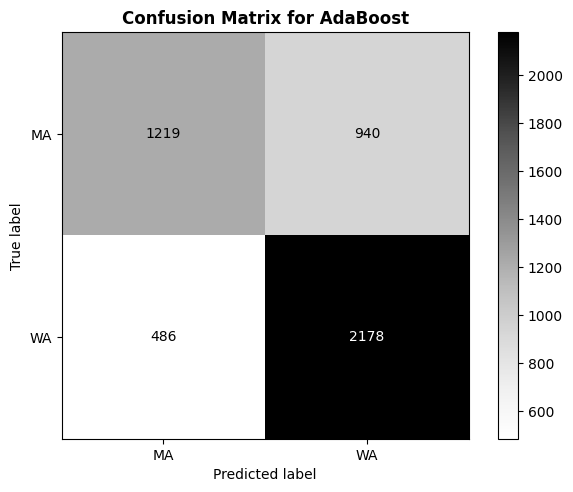

In [16]:
conf_matrix_adaboost = confusion_matrix(y_test, y_pred_adaboost)

# Plot confusion matrix for AdaBoostClassifier
disp_adaboost = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_adaboost, display_labels=class_names)
disp_adaboost.plot(values_format='d', cmap=plt.cm.Greys)
plt.tight_layout()
plt.title('Confusion Matrix for AdaBoost', fontweight='bold')
plt.show()


# ExtraTreesClassifier



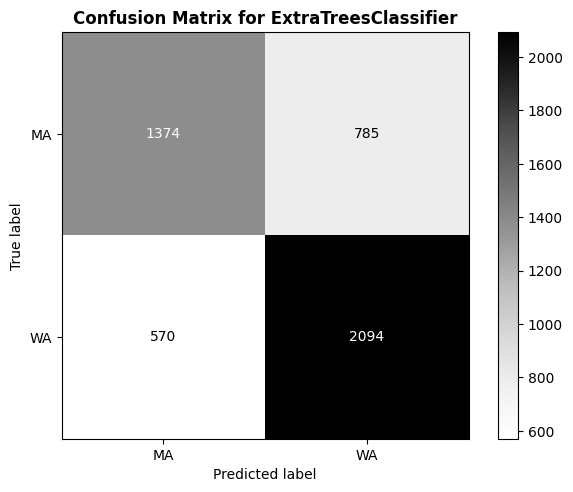

In [17]:
from sklearn.ensemble import ExtraTreesClassifier

pipe_extra_trees = Pipeline([
    ('standardize', StandardScaler()),
    ('model', ExtraTreesClassifier(random_state=42))
])

pipe_extra_trees.fit(x_train_svd, y_train)

y_pred_extra_trees = pipe_extra_trees.predict(x_test_svd)

conf_matrix_extra_trees = confusion_matrix(y_test, y_pred_extra_trees)

disp_extra_trees = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_extra_trees, display_labels=class_names)
disp_extra_trees.plot(values_format='d', cmap=plt.cm.Greys)
plt.tight_layout()
plt.title('Confusion Matrix for ExtraTreesClassifier', fontweight='bold')
plt.show()


In [18]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Calculate scores for ExtraTreesClassifier
accuracy_extra_trees = accuracy_score(y_test, y_pred_extra_trees)
recall_extra_trees = recall_score(y_test, y_pred_extra_trees)
precision_extra_trees = precision_score(y_test, y_pred_extra_trees)
f1_extra_trees = f1_score(y_test, y_pred_extra_trees)

# Print scores for ExtraTreesClassifier
print('ExtraTreesClassifier:')
print('confusion_matrix:\n', conf_matrix_extra_trees)
print('accuracy:', accuracy_extra_trees)
print('recall:', recall_extra_trees)
print('precision:', precision_extra_trees)
print('f1_score:', f1_extra_trees)


ExtraTreesClassifier:
confusion_matrix:
 [[1374  785]
 [ 570 2094]]
accuracy: 0.7190545303752851
recall: 0.786036036036036
precision: 0.7273358805140674
f1_score: 0.7555475374346021


# ROC

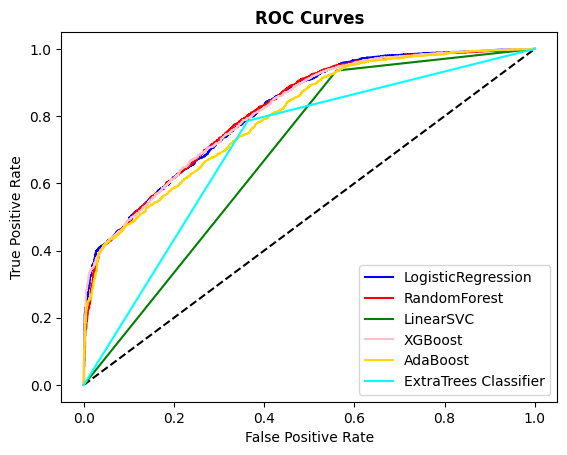

In [33]:
# aggregated ROC curves
from sklearn.metrics import roc_curve

fpr_logistic, tpr_logistic, _ = roc_curve(y_test, y_pred_prob_logistic)
fpr_rfc, tpr_rfc, _  = roc_curve(y_test, y_pred_prob_rfc)
fpr_svc, tpr_svc, _  = roc_curve(y_test, y_pred_prob_svc)
fpr_xgb, tpr_xgb, _  = roc_curve(y_test, y_pred_prob_xgb)
fpr_adaboost, tpr_adaboost, _  = roc_curve(y_test, y_pred_prob_adaboost)
fpr_extra_trees, tpr_extra_trees, _ = roc_curve(y_test, y_pred_extra_trees)

plt.plot([0, 1], [0, 1], 'k--')

plt.plot(fpr_logistic, tpr_logistic, label = 'LogisticRegression', color='b', linewidth=1.5)
plt.plot(fpr_rfc, tpr_rfc, label = 'RandomForest', color='r', linewidth=1.5)
plt.plot(fpr_svc, tpr_svc, label = 'LinearSVC', color='g', linewidth=1.5)
plt.plot(fpr_xgb, tpr_xgb, label = 'XGBoost', color='pink', linewidth=1.5)
plt.plot(fpr_adaboost, tpr_adaboost, label = 'AdaBoost', color='gold', linewidth=1.5)
plt.plot(fpr_extra_trees, tpr_extra_trees, label = 'ExtraTrees Classifier', color='cyan', linewidth=1.5)


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.title('ROC Curves', weight='bold')
plt.show()


# Results

ROC plots and confusion matrices for each of the models are plotted.

The results are summarised in the table below :


| Model                   | Accuracy | Recall  | Precision | F1 Score |
|-------------------------|----------|---------|-----------|----------|
| Logistic Regression (Baseline)     | 0.725    | 0.931 | 0.685     | **0.789**    |
| Random Forest Classifier| **0.729** | 0.818   | 0.726     | 0.769    |
| SVC                     | 0.714    | **0.935** | 0.673     | 0.783    |
| XGBoost                 | 0.723    | 0.800   | 0.726     | 0.761    |
| AdaBoost                | 0.704    | 0.818   | 0.699     | 0.753    |
| ExtraTreesClassifier    | 0.719    | 0.786   | **0.727** | 0.756 |


Based on Accuracy, Random Forest Classifier gives the best results. Logistic Regression gives best results in terms of F1 Score. The inference from these results is that the model does pretty well for the task of classifying between the fan
teams of Patriots and Hawks from the superbowl dataset. This inference is backed by the accuracy metrics
and the confusion matrix where a clear binary classification between 2 classes is observed.

### Model-wise analysis:


1. **Logistic Regression**: Achieved a relatively high accuracy score of 72.6%, indicating its ability to make correct predictions overall. However, it had a lower recall score of 93.1%, suggesting that it might struggle to identify all positive instances.

2. **Random Forest Classifier**: Achieved the highest accuracy score of 72.9%, showcasing its effectiveness in making correct predictions. It also had a relatively high recall score of 81.8%, indicating its capability to identify positive instances.

3. **Support Vector Classifier (SVC)**: Although it achieved a high recall score of 93.5%, suggesting its effectiveness in identifying positive instances, its overall accuracy was slightly lower at 71.4%.

4. **XGBoost**: Demonstrated balanced performance with an accuracy of 72.3% and a recall score of 80.0%, indicating its ability to correctly classify instances and identify positive cases.

5. **AdaBoost**: While it had a moderate accuracy of 70.4%, it had the lowest precision and F1 scores among the models, suggesting a higher rate of false positives and a balance between precision and recall.

6. **ExtraTreesClassifier**: Achieved a decent accuracy score of 71.9% and a balanced F1 score of 75.6%, indicating its robustness in handling imbalanced datasets and making accurate predictions.

In summary, each model has its strengths and weaknesses. Random Forest Classifier performed well overall, achieving the highest accuracy, while Support Vector Classifier had the highest recall score. XGBoost showed balanced performance across different metrics. However, AdaBoost had the lowest precision and F1 scores, indicating potential challenges in minimizing false positives. ExtraTreesClassifier demonstrated robustness in handling imbalanced datasets, as reflected in its balanced F1 score.
